# Electricity Demand Analysis (Coding challange)
#### By Ali Rahbar
---
The goal of this task is to predict the demand of electricity for the day August-14-2020, using a model we have trained.

# 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = df = pd.read_csv("/content/Sample Dataset.csv")
df_raw.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


## 2. Explore Data

In [3]:
df_raw.shape

(39408, 12)

In [4]:
df.dtypes

,0
Date,object
Weekday,object
Hour,int64
HOEP,float64
Ontario_Demand,int64
Temperature,float64
Windchill_Index,float64
Wind_Speed,int64
Humidex,float64
Relative_Humidity,int64


In [5]:
display(df_raw.describe())

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000


# 3. Data Cleaning

In [6]:
df_raw.isnull().sum()

,0
Date,0
Weekday,0
Hour,0
HOEP,0
Ontario_Demand,0
Temperature,0
Windchill_Index,0
Wind_Speed,0
Humidex,0
Relative_Humidity,0


### Clip Data to Normalize Outliers for model Accuracy

In [7]:
# List of Columnbs to exclude (Because they are sequantial or the target)
exclude_cols = ['Date', 'Weekday', 'Hour', 'Ontario_Demand']

# Identify columns to clip (all others)
cols_to_clip = [col for col in df_raw.columns if col not in exclude_cols]

# display list
pd.DataFrame(cols_to_clip)

,0
0,HOEP
1,Temperature
2,Windchill_Index
3,Wind_Speed
4,Humidex
5,Relative_Humidity
6,Dew_Point
7,Pressure_Station


In [8]:
# Calculate the Interquartile Range only for the selected columns
Q1 = df_raw[cols_to_clip].quantile(0.25)
Q3 = df_raw[cols_to_clip].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for these columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Combine the results into a Table
pd.DataFrame({
    'Name': lower_bound.index,
    'Low': lower_bound.values,
    'High': upper_bound.values
})

,Name,Low,High
0,HOEP,-25.515,51.325
1,Temperature,-26.500,46.300
2,Windchill_Index,-37.745,52.375
3,Wind_Speed,-8.000,40.000
4,Humidex,-37.725,58.395
5,Relative_Humidity,21.000,117.000
6,Dew_Point,-29.150,36.850
7,Pressure_Station,97.565,101.525


In [9]:
# Make a copy of the original DataFrame
df_clipped = df_raw.copy()

# Apply clipping only to the selected columns
df_clipped[cols_to_clip] = df_raw[cols_to_clip].clip(lower=lower_bound, upper=upper_bound, axis=1)
df_clipped.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


# 4. Feature Engineering and Encoding

1. Convert the dates to date objects and then split them into Year, Month and Day

In [10]:
# copy cliped DF
df_engineered = df_clipped.copy()

# Split the Dates
df_engineered['Date'] = pd.to_datetime(df_engineered['Date'])
df_engineered['Year'] = df_engineered['Date'].dt.year
df_engineered['Month'] = df_engineered['Date'].dt.month
df_engineered['Day'] = df_engineered['Date'].dt.day

# Remove Date Column
df_engineered.drop('Date', axis=1, inplace=True)

# Display head
df_engineered.head()

,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,Year,Month,Day
0,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67,2016,1,1
1,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63,2016,1,1
2,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59,2016,1,1
3,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39,2016,1,1
4,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35,2016,1,1


2. Use one hot encoding to determine the Day of the week.

This will also allow us to take into consideration factiores like week days or weekends.

In [11]:
df_engineered = pd.get_dummies(df_engineered, columns=['Weekday'], prefix='Day')
df_engineered.head()

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,Year,Month,Day,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67,2016,1,1,True,False,False,False,False,False,False
1,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63,2016,1,1,True,False,False,False,False,False,False
2,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59,2016,1,1,True,False,False,False,False,False,False
3,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39,2016,1,1,True,False,False,False,False,False,False
4,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35,2016,1,1,True,False,False,False,False,False,False


# 4. Correlation Analysis
Purpose of this moduyle is to remove all the highly correlated features to avoid over fitting for our model

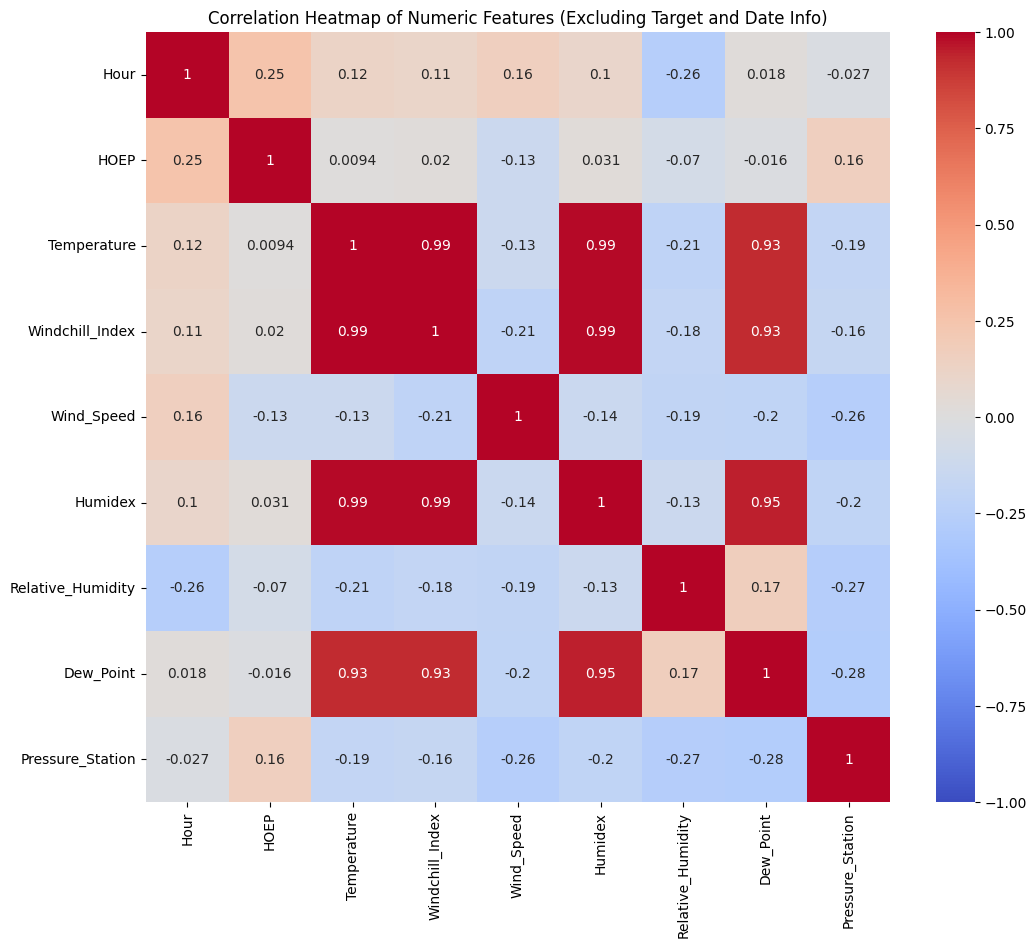

In [66]:
# list the columns to exclude in the analysis
exclude_cols = ['Year',	'Month', 'Day', 'Day_Friday',	'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Thursday',	'Day_Tuesday', 'Day_Wednesday', 'Ontario_Demand']


cols_to_include = [col for col in df_engineered.columns if col not in exclude_cols]

# Compute the correlation matrix on the selected numeric columns.
corr_matrix = df_engineered[cols_to_include].corr()

# Create a heatmap with a colormap that shows high correlations as 'hot' (red) and low as 'cold' (blue)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features (Excluding Target and Date Info)')
plt.show()

In the Graph above we can see that Tempreture is hhighly correlated with diffrent parameters such as `Windchill_Index`, `Humidex` and `Dew_Point`.

This may cause the model to overfit due to overfitting issues and stop it from generalizing properly. To deal with this issue, the `tempreture`, `Windchill_Index` and `Humidex` will be removed from the dataframe and we will keep `Dew_Point`.

In [13]:
# remove tempreture
df_uncorelated = df_engineered.drop('Temperature', axis=1)

# remove windchill index
df_uncorelated = df_uncorelated.drop('Windchill_Index', axis=1)

# remove Humidex
df_uncorelated = df_uncorelated.drop('Humidex', axis=1)

Now lets graph the corelation heat map again

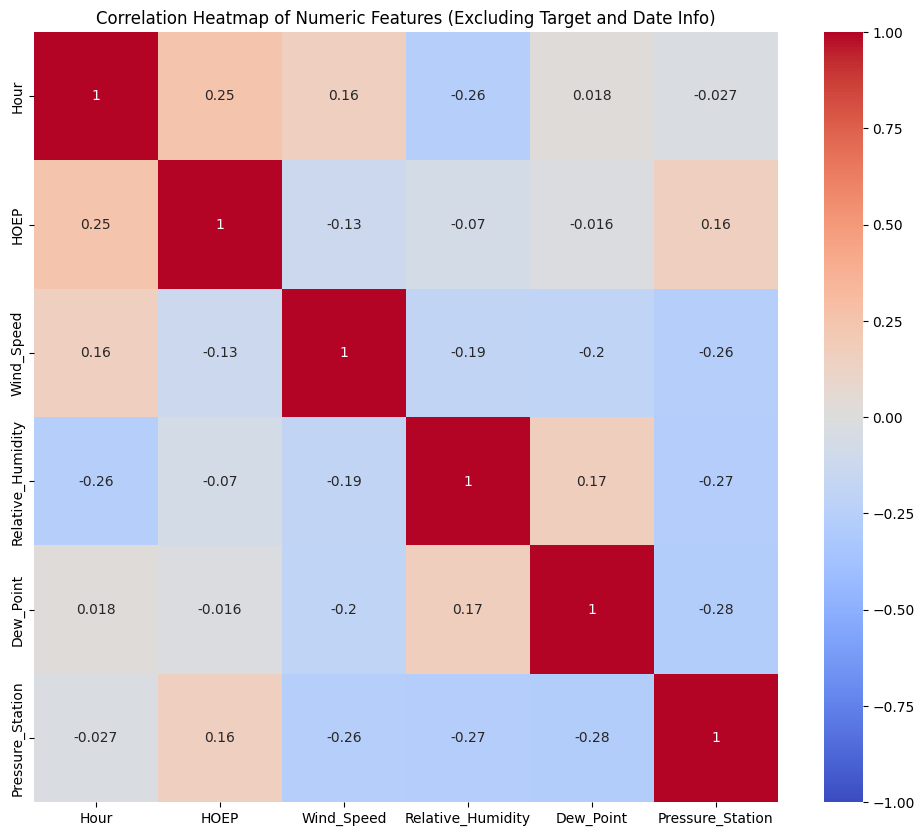

In [14]:
# list the columns to exclude in the analysis
exclude_cols = ['Year',	'Month', 'Day', 'Day_Friday',	'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Thursday',	'Day_Tuesday', 'Day_Wednesday', 'Ontario_Demand']


cols_to_include = [col for col in df_uncorelated.columns if col not in exclude_cols]

# Compute the correlation matrix on the selected numeric columns.
corr_matrix = df_uncorelated[cols_to_include].corr()

# Create a heatmap with a colormap that shows high correlations as 'hot' (red) and low as 'cold' (blue)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features (Excluding Target and Date Info)')
plt.show()

Now that we have dropped the highly correlated columns, we can proceed to train our model.

In [15]:
df_uncorelated.head()

,Hour,HOEP,Ontario_Demand,Wind_Speed,Relative_Humidity,Dew_Point,Pressure_Station,Year,Month,Day,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,0.49,14023,20,70,-5.1,99.67,2016,1,1,True,False,False,False,False,False,False
1,1,-1.09,13417,25,68,-5.5,99.63,2016,1,1,True,False,False,False,False,False,False
2,2,-2.41,12968,26,73,-4.7,99.59,2016,1,1,True,False,False,False,False,False,False
3,12,0.00,14215,23,76,-5.8,99.39,2016,1,1,True,False,False,False,False,False,False
4,13,0.00,14443,19,84,-4.7,99.35,2016,1,1,True,False,False,False,False,False,False


# 6. Split Data into Training & Test Sets

In [16]:
from sklearn.model_selection import train_test_split

Before we continue any firther, we will be removing the values for August 14 2024 to avoid a data leak in the data

In [41]:
df_uncorelated_no_aug14 = df_uncorelated.loc[
    ~(
        (df_uncorelated["Year"] == 2020) &
        (df_uncorelated["Month"] == 8) &
        (df_uncorelated["Day"] == 14)
    )
].copy()

# Optional: Check how many rows were removed
print("Original shape:", df_uncorelated.shape)
print("New shape:", df_uncorelated_no_aug14.shape)

Original shape: (39408, 17)
New shape: (39384, 17)


In [42]:
X = df_uncorelated_no_aug14.drop(['Ontario_Demand'], axis=1)  # drop any non-predictive columns
y = df_uncorelated_no_aug14['Ontario_Demand'].values

Now lets split the data into train and test.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # 42 for reprodiucability
)

# 7. Data Standardization
many models perform better when they are standardized

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[-0.09446942, -0.10136501, -0.64802955, ..., -0.4112594 ,
        -0.41009833,  2.43374071],
       [-0.8137657 , -1.04149421,  0.92387492, ..., -0.4112594 ,
        -0.41009833, -0.41089012],
       [-1.53306199,  0.77726829, -0.64802955, ...,  2.43155539,
        -0.41009833, -0.41089012],
       ...,
       [-0.09446942,  1.81680183, -1.09714512, ..., -0.4112594 ,
        -0.41009833, -0.41089012],
       [ 1.20026389, -1.00695541,  0.02564379, ..., -0.4112594 ,
        -0.41009833, -0.41089012],
       [ 0.33710835, -1.40288796,  1.03615381, ..., -0.4112594 ,
        -0.41009833, -0.41089012]])

# 8. Develop base model

Here we wil be developing a linear regresssion model both as a base line and becasue linear regression data is justifiable and one can understand what a regression model is doiong.

here we will fit and test the model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# fit model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
import numpy as np

y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy_like = 100 - mape

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)
print("MAPE:", mape, "%")
print("Accuracy-like Score:", accuracy_like, "%")


MSE: 1929693.9490794383
RMSE: 1389.1342444412774
R^2 Score: 0.6042880022806558
MAPE: 7.242320352954208 %
Accuracy-like Score: 92.75767964704579 %


Okay and now we have a base model to compare our current model with.


# 9. Develop Main Model

In this section, we will build the main model to forecast electricity demand using XGBoost. We chose XGBoost for several simple reasons:

- **High Accuracy:** It captures complex patterns in the data, leading to more precise predictions.
- **Fast Training:** XGBoost is quick to train, even on large datasets.
- **Robust to Outliers:** It works well even when there are unusual or extreme values in the data.
- **Flexible:** It can handle various types of features, such as time of day, weather conditions, and day-specific information.

We'll start by setting up the XGBoost model, train it on our processed dataset, and then fine-tune it to improve our forecasting results.

In [49]:
from xgboost import XGBRegressor
import numpy as np

In [50]:
# Initialize the XGBoost Regressor with basic parameters.
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression
    n_estimators=100,              # Number of trees
    learning_rate=0.1,             # Step size shrinkage
    random_state=42                # For reproducibility
)

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate MAPE and Accuracy-like score
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
accuracy_like_xgb = 100 - mape_xgb

# Print metrics
print("XGBoost MSE:", mse_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R^2 Score:", r2_xgb)
print("XGBoost MAPE:", mape_xgb, "%")
print("XGBoost Accuracy-like Score:", accuracy_like_xgb, "%")


XGBoost MSE: 262831.5625
XGBoost RMSE: 512.6710080548734
XGBoost R^2 Score: 0.9461025595664978
XGBoost MAPE: 2.5302162722863417 %
XGBoost Accuracy-like Score: 97.46978372771366 %


To fine-tune the model accuracy, we will use a loop to test different model hyperparameters and identify the optimal combination for accurate predictions.

\\
We are doing this because there are no simple or direct correlations between hyperparameters and model performance, so we will use a brute force search method.

\\
We will combine the model training code with a sorting algorithm to find the hyperparameters that yield the highest accuracy score.

In [52]:
def train_model(
    X_train,
    y_train,
    max_depth,
    learning_rate,
    n_estimators,
    subsample,
    colsample_bytree,
    min_child_weight,
    gamma
):
    """
    Trains and returns an XGBRegressor using the specified hyperparameters.
    """
    model = XGBRegressor(
        objective='reg:squarederror',
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        random_state=42 # for replacability
    )
    model.fit(X_train, y_train)
    return model


In [53]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model on the given test set.
    Returns R^2, MSE, and accuracy-like score (100 - MAPE).
    """
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # "Accuracy-like" is just 100 - MAPE
    accuracy_like = 100 - mape

    return r2, mse, accuracy_like

Now bellow ius the loop to brute force the best model. Here we are allowed to do so because looping through all these options is not expensive for us. Yet if the project was bigger, this may have not been a proper solution to finding the best

In [54]:
# Hyper parameters grid
max_depth_values = [3, 5, 7]
learning_rate_values = [0.1, 0.01]
n_estimators_values = [100, 200]
subsample_values = [0.8, 1.0]
colsample_bytree_values = [0.8, 1.0]
min_child_weight_values = [1, 3, 5]
gamma_values = [0, 0.1, 1]


In [55]:
results = []  # Will store tuples: (params_dict, R^2, MSE, Accuracy-like)

for max_depth in max_depth_values:
    for lr in learning_rate_values:
        for n_estimators in n_estimators_values:
            for subsample in subsample_values:
                for colsample_bytree in colsample_bytree_values:
                    for min_child_weight in min_child_weight_values:
                        for gamma in gamma_values:
                            # Train the model with current hyperparameters
                            model = train_model(
                                X_train_scaled,
                                y_train,
                                max_depth,
                                lr,
                                n_estimators,
                                subsample,
                                colsample_bytree,
                                min_child_weight,
                                gamma
                            )

                            # Evaluate the model (now returning 3 values)
                            current_r2, current_mse, current_accuracy_like = evaluate_model(
                                model,
                                X_test_scaled,
                                y_test
                            )

                            # Save the result including accuracy-like
                            params = {
                                "max_depth": max_depth,
                                "learning_rate": lr,
                                "n_estimators": n_estimators,
                                "subsample": subsample,
                                "colsample_bytree": colsample_bytree,
                                "min_child_weight": min_child_weight,
                                "gamma": gamma
                            }
                            results.append((params, current_r2, current_mse, current_accuracy_like))


In [56]:
print(len(results))

432


So we have gone throguh 432 possible models and picked the best one

In [57]:
# Sort results by accuracy-like score (highest first)
results_sorted = sorted(results, key=lambda x: x[3], reverse=True)

# Extract the best model
best_params, best_r2, best_mse, best_accuracy_like = results_sorted[0]

# Generate a nice text report
report = f"""
============================
  Model Performance Report
============================

Best Model (by Accuracy-like Score):

Hyperparameters:
  max_depth         : {best_params['max_depth']}
  learning_rate     : {best_params['learning_rate']}
  n_estimators      : {best_params['n_estimators']}
  subsample         : {best_params['subsample']}
  colsample_bytree  : {best_params['colsample_bytree']}
  min_child_weight  : {best_params['min_child_weight']}
  gamma             : {best_params['gamma']}

Performance Metrics:
  Accuracy-like     : {best_accuracy_like:.2f}%
  R^2 Score         : {best_r2:.4f}
  MSE               : {best_mse:.2f}
"""

print(report)



  Model Performance Report

Best Model (by Accuracy-like Score):

Hyperparameters:
  max_depth         : 7
  learning_rate     : 0.1
  n_estimators      : 200
  subsample         : 0.8
  colsample_bytree  : 1.0
  min_child_weight  : 3
  gamma             : 0

Performance Metrics:
  Accuracy-like     : 98.10%
  R^2 Score         : 0.9686
  MSE               : 153184.38



In [58]:
# Use the best hyperparameters from our search (stored in best_params) to retrain the final model
final_model = train_model(
    X_train_scaled,
    y_train,
    best_params["max_depth"],
    best_params["learning_rate"],
    best_params["n_estimators"],
    best_params["subsample"],
    best_params["colsample_bytree"],
    best_params["min_child_weight"],
    best_params["gamma"]
)

# Optionally, evaluate the final model on the test set
final_r2, final_mse, final_accuracy_like = evaluate_model(final_model, X_test_scaled, y_test)

# Calculate additional metrics
y_new_pred = final_model.predict(X_test_scaled)
final_rmse = np.sqrt(final_mse)

# Print all metrics
print(f"Final Model Performance: R² = {final_r2:.4f}, MSE = {final_mse:.2f}")
print(f"Final Model RMSE: {final_rmse:.2f}")
print(f"Final Model Accuracy-like Score: {final_accuracy_like:.2f}%")


Final Model Performance: R² = 0.9686, MSE = 153184.38
Final Model RMSE: 391.39
Final Model Accuracy-like Score: 98.10%


# 10. Forcast

Use the model to forcase the electricity for 24 hours of electricity on a august 14, 2020 and make a graph

In [59]:
# FILTER FOR AUG 14, 2020

df_aug14_2020 = df_uncorelated[
    (df_uncorelated["Year"] == 2020) &
    (df_uncorelated["Month"] == 8) &
    (df_uncorelated["Day"] == 14)
].copy()

# Just to be sure we have 24 rows for 0..23 hours:
print("Number of rows for Aug 14, 2020:", len(df_aug14_2020))
df_aug14_2020.head()


Number of rows for Aug 14, 2020: 24


,Hour,HOEP,Ontario_Demand,Wind_Speed,Relative_Humidity,Dew_Point,Pressure_Station,Year,Month,Day,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
36104,0,19.40,17098,7,50,12.7,99.92,2020,8,14,True,False,False,False,False,False,False
36105,1,14.35,14919,9,54,13.4,99.90,2020,8,14,True,False,False,False,False,False,False
36106,2,15.52,14719,7,57,13.6,99.91,2020,8,14,True,False,False,False,False,False,False
36107,3,4.58,13935,9,55,13.3,99.89,2020,8,14,True,False,False,False,False,False,False
36108,4,0.00,13521,9,56,13.1,99.88,2020,8,14,True,False,False,False,False,False,False


In [60]:
# SPLIT FEATURES VS. TARGET FOR AUG 14

# We'll keep actual demand so we can compare to predicted.
y_aug14_2020_actual = df_aug14_2020["Ontario_Demand"].values

# Drop the target from the DataFrame to form the features.
# Make sure the columns match the final model’s input (the same columns as X_train had).
X_aug14_2020 = df_aug14_2020.drop(["Ontario_Demand"], axis=1).values


In [61]:
# SCALE THE FEATURES (WITHOUT re-fitting)

X_aug14_2020_scaled = scaler.transform(X_aug14_2020)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
y_aug14_2020_pred = final_model.predict(X_aug14_2020_scaled)

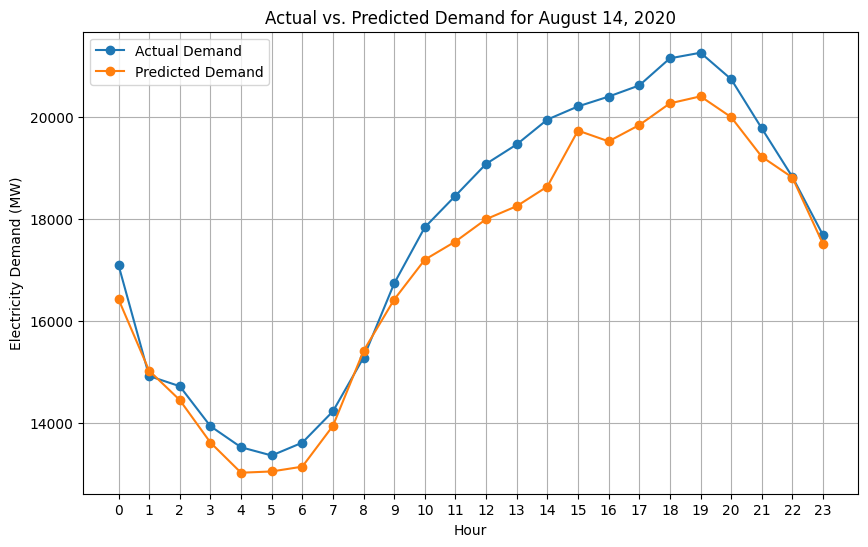

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual demand
plt.plot(df_aug14_2020["Hour"], y_aug14_2020_actual, label="Actual Demand", marker="o")

# Plot predicted demand
plt.plot(df_aug14_2020["Hour"], y_aug14_2020_pred, label="Predicted Demand", marker="o")

plt.title("Actual vs. Predicted Demand for August 14, 2020")
plt.xlabel("Hour")
plt.ylabel("Electricity Demand (MW)")
plt.xticks(range(24))  # so we see hours 0..23
plt.grid(True)
plt.legend()
plt.show()


In [64]:
import numpy as np


# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_aug14_2020_actual - y_aug14_2020_pred) / y_aug14_2020_actual)) * 100

# Compute accuracy-like percentage
accuracy_like = 100 - mape

print("Accuracy-like Percentage:", accuracy_like)


Accuracy-like Percentage: 96.83077522858531
